In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Titanin_train.csv",
                 usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
x = df.iloc[:,1:3]
y= df.iloc[:,0]

In [10]:
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\sanja\AppData\Local\Temp\ipykernel_1380\494658039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


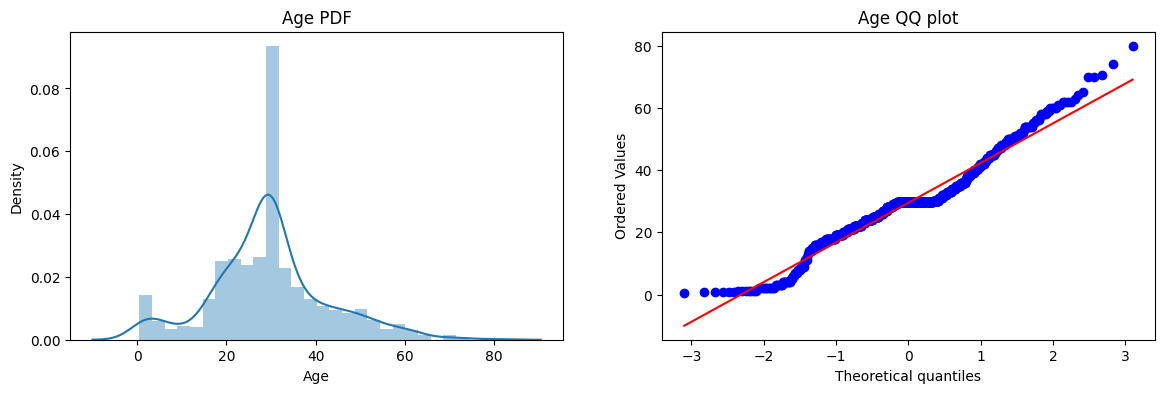

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ plot")

plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_1380\3196436285.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


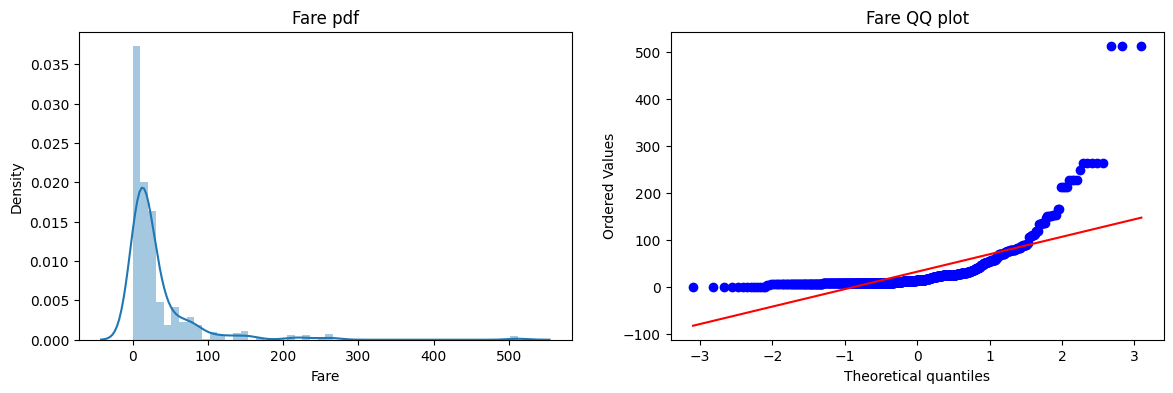

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [13]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
accuracy DT 0.664804469273743


In [15]:
trf = FunctionTransformer(func=np.log1p)

In [16]:
x_train_transformed = trf.fit_transform(X_train)
x_test_transformed = trf.fit_transform(X_test)

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy score",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy score 0.6871508379888268
